# Zadanie: Baza Filmów

## Wczytywanie Danych

In [44]:
import pandas as pd

movies_url = 'https://raw.githubusercontent.com/konradp-86/kurs/main/tmdb_movies.csv'
genres_url = 'https://raw.githubusercontent.com/konradp-86/kurs/main/tmdb_genres.csv'

movies = pd.read_csv(movies_url)
genres = pd.read_csv(genres_url)


In [45]:
movies_bez_overview = movies.drop('overview', axis=1)
movies_styled = movies_bez_overview.head(10).style.set_table_styles().set_properties()
movies_styled

,Unnamed: 0,budget,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.000000,Released,Enter the World of Pandora.,Avatar,7.200000,11800,28.000000
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.000000,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.900000,4500,12.000000
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,107.376788,2015-10-26,880674609,148.000000,Released,A Plan No One Escapes,Spectre,6.300000,4466,28.000000
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.000000,Released,The Legend Ends,The Dark Knight Rises,7.600000,9106,28.000000
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,43.926995,2012-03-07,284139100,132.000000,Released,"Lost in our world, found in another.",John Carter,6.100000,2124,28.000000
5,5,258000000,http://www.sonypictures.com/movies/spider-man3/,559,en,Spider-Man 3,115.699814,2007-05-01,890871626,139.000000,Released,The battle within.,Spider-Man 3,5.900000,3576,14.000000
6,6,260000000,http://disney.go.com/disneypictures/tangled/,38757,en,Tangled,48.681969,2010-11-24,591794936,100.000000,Released,They're taking adventure to new lengths.,Tangled,7.400000,3330,16.000000
7,7,280000000,http://marvel.com/movies/movie/193/avengers_age_of_ultron,99861,en,Avengers: Age of Ultron,134.279229,2015-04-22,1405403694,141.000000,Released,A New Age Has Come.,Avengers: Age of Ultron,7.300000,6767,28.000000
8,8,250000000,http://harrypotter.warnerbros.com/harrypotterandthehalf-bloodprince/dvd/index.html,767,en,Harry Potter and the Half-Blood Prince,98.885637,2009-07-07,933959197,153.000000,Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.400000,5293,12.000000
9,9,250000000,http://www.batmanvsupermandawnofjustice.com/,209112,en,Batman v Superman: Dawn of Justice,155.790452,2016-03-23,873260194,151.000000,Released,Justice or revenge,Batman v Superman: Dawn of Justice,5.700000,7004,28.000000


## Lista 10 najlepiej ocenianych 

In [46]:
próg_głosów = movies['vote_count'].quantile(0.75)

najlepsze_filmy = movies[movies['vote_count'] > próg_głosów].sort_values(by='vote_average', ascending=False)

top_10_filmów = najlepsze_filmy[['title', 'vote_average', 'vote_count']].head(10)
print(top_10_filmów)


                            title  vote_average  vote_count
1881     The Shawshank Redemption           8.5        8205
3337                The Godfather           8.4        5893
662                    Fight Club           8.3        9413
2731       The Godfather: Part II           8.3        3338
3232                 Pulp Fiction           8.3        8428
2294                Spirited Away           8.3        3840
1818             Schindler's List           8.3        4329
3865                     Whiplash           8.3        4254
1663  Once Upon a Time in America           8.2        1069
1847                   GoodFellas           8.2        3128


## Średni przychód i budżet w latach 2010 - 2016

In [50]:
import pandas as pd

movies['rok'] = pd.to_datetime(movies['release_date']).dt.year

filmy_2010_2016 = movies[(movies['rok'] >= 2010) & (movies['rok'] <= 2016)]

średnie_dane = filmy_2010_2016.groupby('rok')[['revenue', 'budget']].mean().reset_index()

średnie_dane['revenue'] = średnie_dane['revenue'].apply(lambda x: f"{x:,.2f}")
średnie_dane['budget'] = średnie_dane['budget'].apply(lambda x: f"{x:,.2f}")

print(średnie_dane)


      rok         revenue         budget
0  2010.0   90,438,110.08  34,495,410.94
1  2011.0   92,004,130.76  34,772,320.34
2  2012.0  116,065,914.64  34,922,031.99
3  2013.0  101,348,455.82  35,523,293.65
4  2014.0  101,346,599.11  30,959,887.86
5  2015.0  105,439,926.95  31,132,163.74
6  2016.0  139,049,586.04  45,703,269.23


Exception ignored in: <function ZipFile.__del__ at 0x0000025C595614E0>
Traceback (most recent call last):
  File "C:\Users\Gosia\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1940, in __del__
    self.close()
  File "C:\Users\Gosia\AppData\Local\Programs\Python\Python312\Lib\zipfile\__init__.py", line 1957, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


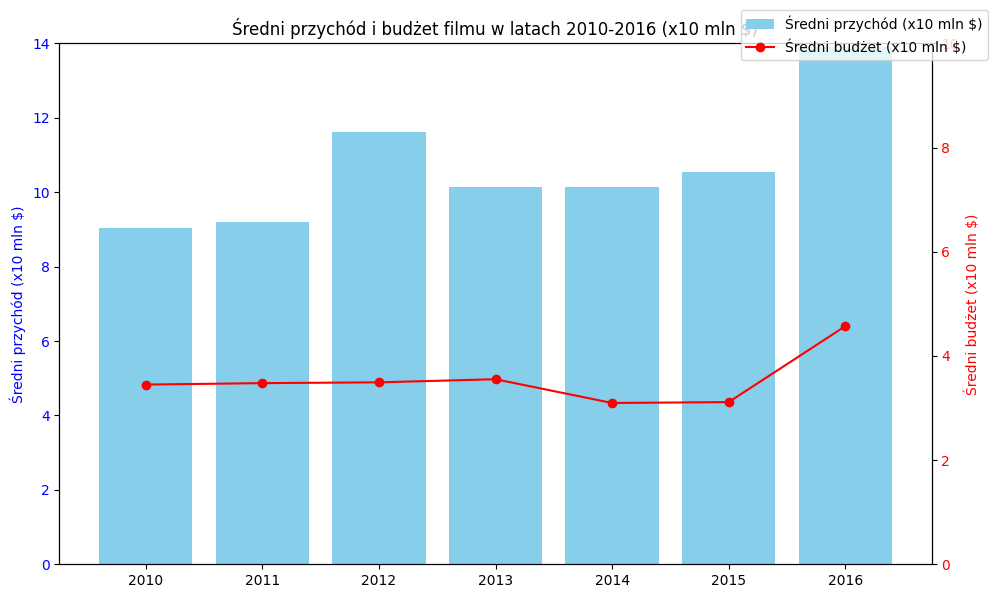

In [51]:
import matplotlib.pyplot as plt

lata = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
revenue = [90438110.08, 92004130.76, 116065914.64, 101348455.82, 101346599.11, 105439926.95, 139049586.04]
budget = [34495410.94, 34772320.34, 34922031.99, 35523293.65, 30959887.86, 31132163.74, 45703269.23]

revenue_mil = [x / 1e7 for x in revenue] 
budget_mil = [x / 1e7 for x in budget]   

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(lata, revenue_mil, color='skyblue', label='Średni przychód (x10 mln $)')
ax1.set_ylabel('Średni przychód (x10 mln $)', color='blue') 
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 14) 

ax2 = ax1.twinx()
ax2.plot(lata, budget_mil, color='red', marker='o', label='Średni budżet (x10 mln $)')
ax2.set_ylabel('Średni budżet (x10 mln $)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 10) 

plt.title('Średni przychód i budżet filmu w latach 2010-2016 (x10 mln $)')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## Łączenie tabel na podstawie kolumny Gatunek

In [52]:
filmy_gatunki = pd.merge(movies, genres, how='left', left_on='genre_id', right_on='Unnamed: 0')
print(filmy_gatunki[['title', 'genre_id', 'genres']].head())

                                      title  genre_id     genres
0                                    Avatar      28.0     Action
1  Pirates of the Caribbean: At World's End      12.0  Adventure
2                                   Spectre      28.0     Action
3                     The Dark Knight Rises      28.0     Action
4                               John Carter      28.0     Action


## Najwięcej filmów z jednego gatunku

In [53]:
liczba_filmów_w_gatunku = filmy_gatunki['genres'].value_counts()

najczęstszy_gatunek = liczba_filmów_w_gatunku.idxmax()
liczba_filmów = liczba_filmów_w_gatunku.max()

print(f"Najczęstszy gatunek filmów: {najczęstszy_gatunek} ({liczba_filmów} filmów)")


Najczęstszy gatunek filmów: Drama (1207 filmów)


## Gatunek filmów z najdłuższym średnim czasem trwania

In [56]:
średni_czas_trwania = filmy_gatunki.groupby('genres')['runtime'].mean().sort_values(ascending=False)

gatunek_najdłuższy = średni_czas_trwania.idxmax()
średni_runtime = średni_czas_trwania.max()

print(f"Gatunek z najdłuższym średnim czasem trwania: {gatunek_najdłuższy} (średnio {średni_runtime:.2f} minut)")


Gatunek z najdłuższym średnim czasem trwania: History (średnio 133.96 minut)


## Histogram czasu trwania filmów 

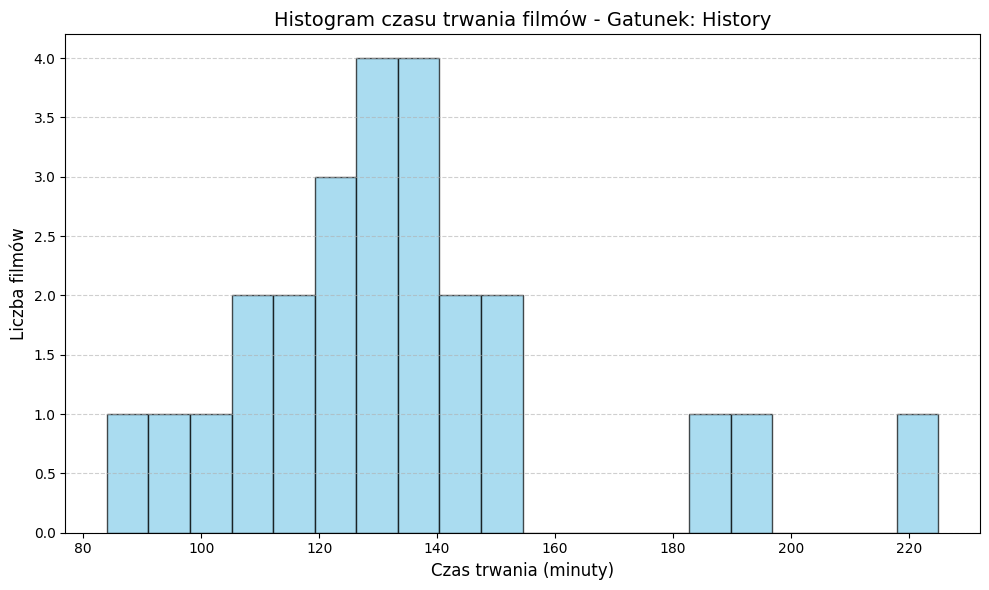

In [61]:
filmy_najdłuższy_gatunek = filmy_gatunki[filmy_gatunki['genres'] == gatunek_najdłuższy]

plt.figure(figsize=(10, 6))
plt.hist(filmy_najdłuższy_gatunek['runtime'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.title(f'Histogram czasu trwania filmów - Gatunek: {gatunek_najdłuższy}', fontsize=14)
plt.xlabel('Czas trwania (minuty)', fontsize=12)
plt.ylabel('Liczba filmów', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

